In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from import_clean_data import load_annotated_meter_data, load_co2_data
import warnings

In [2]:
import matplotlib.pyplot as plt

In [3]:
DATA_DIR = (Path.cwd() / ".." / "Data").resolve()

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    co2 = load_co2_data(DATA_DIR)

In [5]:
co2

,datetime,co2_intensity,co2_production,co2_import,production,consumption,nuclear,geothermal,biomass,coal,wind,solar,hydro,gas,oil,unknown,battery,hydro
0,2020-01-01 00:00:00+00:00,115.53,42.25,239.46,4679.0,7012.0,3321.21,0.14,235.03,442.94,445.71,0.00,1034.33,293.46,18.54,1038.76,0.0,181.97
1,2020-01-01 01:00:00+00:00,113.57,46.79,255.94,4960.0,7134.0,3224.89,0.14,224.68,432.04,437.79,0.00,1046.74,245.34,17.31,1323.84,0.0,181.31
2,2020-01-01 02:00:00+00:00,113.70,30.13,235.80,4081.0,6973.0,3671.14,3.17,252.13,471.63,472.28,0.01,1107.86,306.60,20.47,586.79,0.0,81.00
3,2020-01-01 03:00:00+00:00,110.52,48.75,231.63,4944.0,7581.0,3638.54,9.61,206.78,376.36,365.74,0.02,1036.09,323.40,17.47,1510.04,0.0,97.00
4,2020-01-01 04:00:00+00:00,111.10,41.83,240.52,4602.0,7180.0,3571.64,5.70,222.40,411.97,397.42,0.02,1041.85,290.49,18.23,1123.35,0.0,97.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,2021-06-30 19:00:00+00:00,74.55,71.97,NaN,9277.0,6200.0,918.46,0.00,0.00,0.00,0.00,0.00,1812.00,0.00,0.00,2405.48,0.0,1064.06
13124,2021-06-30 20:00:00+00:00,78.65,77.04,NaN,9648.0,6535.0,943.88,0.00,0.00,0.00,0.00,0.00,1715.01,0.00,0.00,2823.69,0.0,1052.42
13125,2021-06-30 21:00:00+00:00,103.10,71.17,348.64,7443.0,5730.0,1061.13,0.22,52.81,184.39,128.09,0.00,1456.45,83.60,4.48,2066.78,0.0,692.06
13126,2021-06-30 22:00:00+00:00,120.71,82.12,342.61,6570.0,5640.0,1215.24,0.34,76.70,251.02,193.26,0.01,967.38,95.31,6.64,2635.87,0.0,198.25


In [6]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
day_mapping = {i: key for i, key in enumerate(days)}

In [7]:
month_mapping = {
    "Winter": (1, 2, 3), 
    "Spring": (4, 5, 6), 
    "Summer": (7, 8, 9), 
    "Autumn": (10, 11, 12)
}
reverse_month = {i: key for key, tpl in month_mapping.items() for i in tpl}

In [8]:
co2['day'] = co2['datetime'].dt.dayofweek.apply(lambda x: day_mapping[x])

In [9]:
co2['season'] = co2['datetime'].dt.month.apply(lambda x: reverse_month[x])

In [10]:
co2['hour'] = co2['datetime'].dt.hour

In [11]:
cmap = plt.get_cmap('tab10')
day_cmap = {key: cmap(i / 6) for i, key in enumerate(days)}

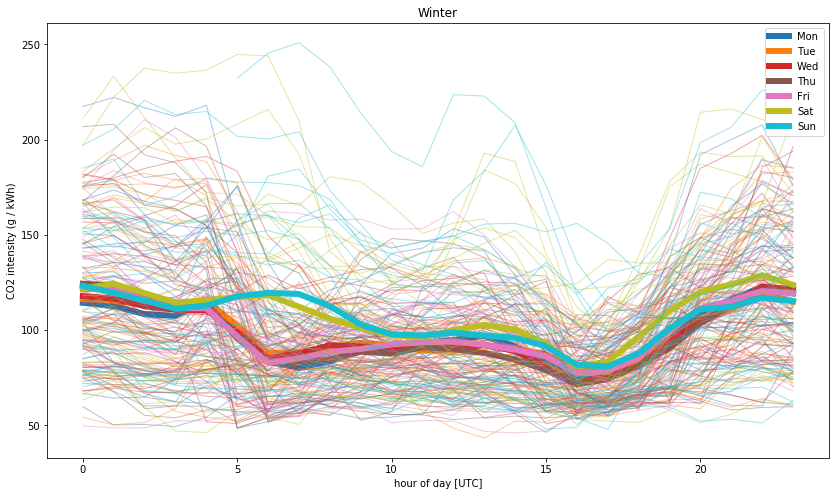

<Figure size 432x288 with 0 Axes>

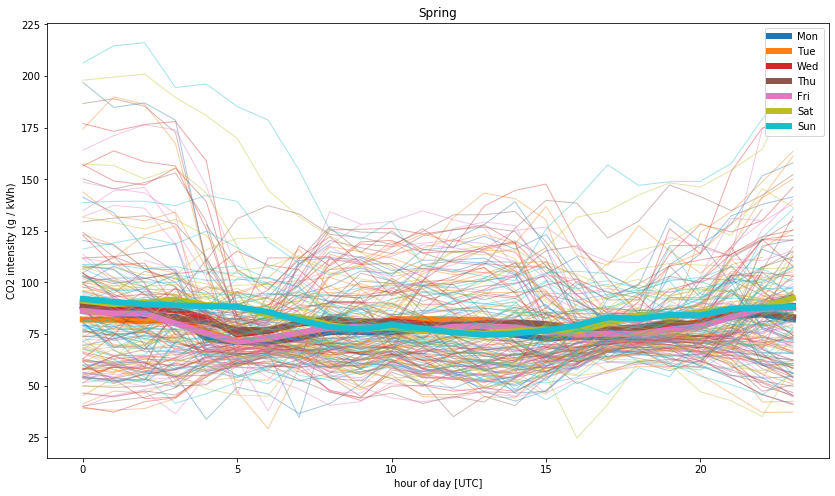

<Figure size 432x288 with 0 Axes>

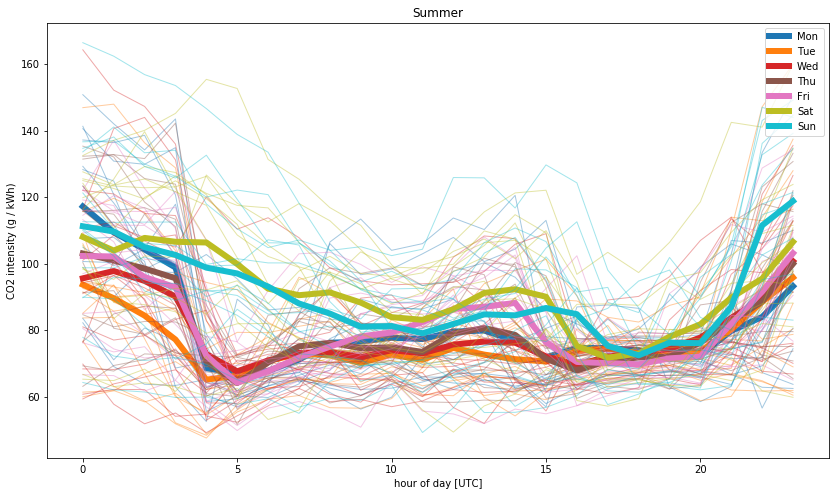

<Figure size 432x288 with 0 Axes>

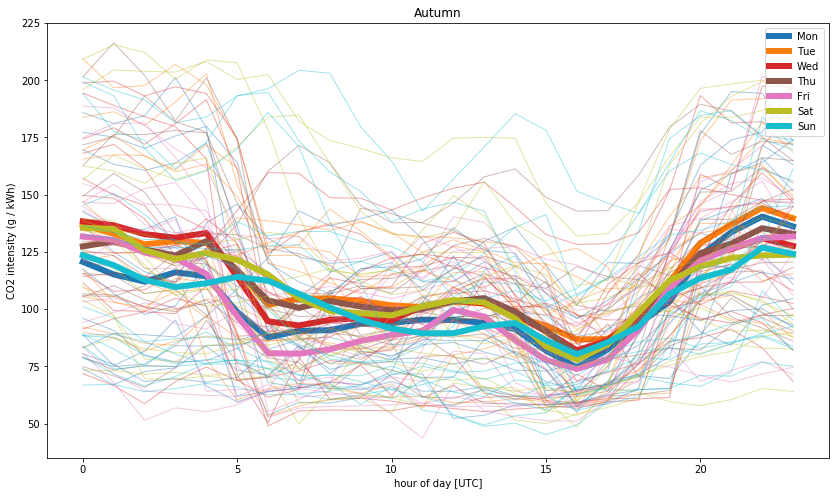

<Figure size 432x288 with 0 Axes>

In [12]:
for season in month_mapping:
    plt.figure(figsize=(14, 8))
    plt.title(season)

    seasonal_df = co2[co2['season'] == season]

    for day in ("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"):
        daily_df = seasonal_df[seasonal_df["day"] == day]
        
        for j, date in enumerate(daily_df.datetime.dt.date.unique()):
            df = daily_df[daily_df.datetime.dt.date == date]
            plt.plot(df.hour, df['co2_intensity'], color=day_cmap[day], lw=1, alpha=0.4)

        plt.plot(df.hour, daily_df.groupby('hour').mean()['co2_intensity'], color=day_cmap[day], lw=6, label=day)            
            
    plt.ylabel("CO2 intensity (g / kWh)")
    plt.xlabel("hour of day [UTC]")
    plt.legend(loc="upper right")
    plt.show()
    plt.savefig(DATA_DIR / ".." / "Images" / f"CO2 by day by season {season}.png", dpi=300)
    plt.clf()

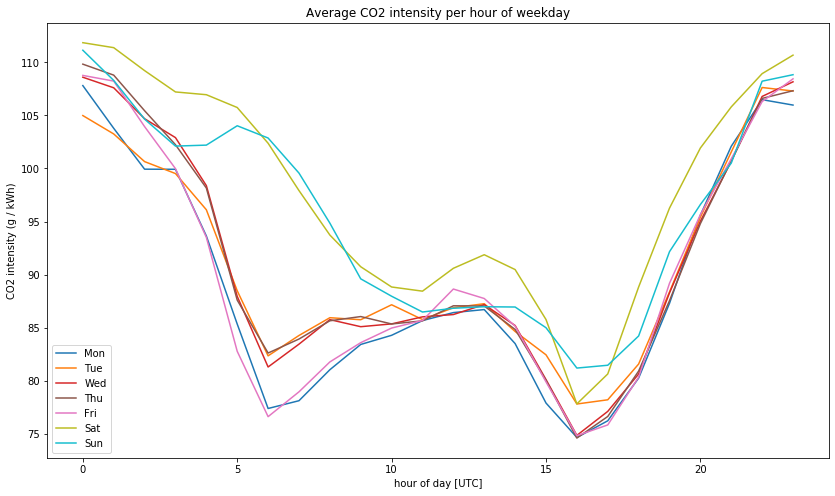

In [13]:
plt.figure(figsize=(14, 8))
plt.title("Average CO2 intensity per hour of weekday")

for day in ("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"):
    df = co2[co2["day"] == day].groupby('hour').mean()
    plt.plot(df.index, df['co2_intensity'], color=day_cmap[day], label=day)            

plt.ylabel("CO2 intensity (g / kWh)")
plt.xlabel("hour of day [UTC]")
plt.legend()
plt.savefig(DATA_DIR / ".." / "Images" / "Daily CO2 by hour.png", dpi=300)

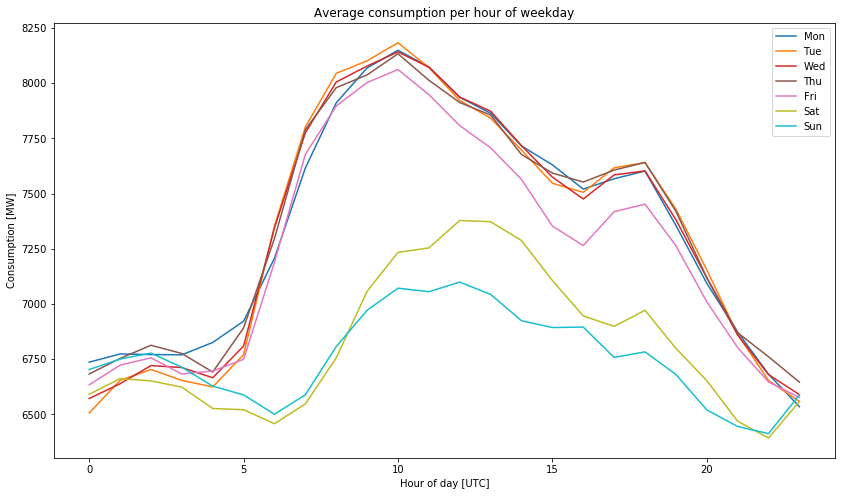

In [15]:
plt.figure(figsize=(14, 8))
plt.title("Average consumption per hour of weekday")

for day in ("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"):
    df = co2[co2["day"] == day].groupby('hour').mean()
    plt.plot(df.index, df['consumption'], color=day_cmap[day], label=day)            

plt.ylabel("Consumption [MW]")
plt.xlabel("Hour of day [UTC]")
plt.legend()
plt.savefig(DATA_DIR / ".." / "Images" / "Daily consumption by hour.png", dpi=300)

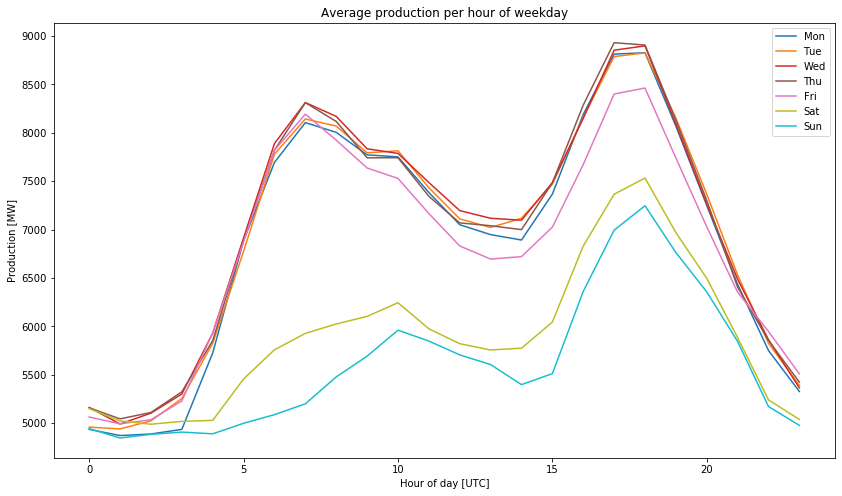

In [12]:
plt.figure(figsize=(14, 8))
plt.title("Average production per hour of weekday")

for day in ("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"):
    df = co2[co2["day"] == day].groupby('hour').mean()
    plt.plot(df.index, df['production'], color=day_cmap[day], label=day)            

plt.ylabel("Production [MW]")
plt.xlabel("Hour of day [UTC]")
plt.legend()
plt.savefig(DATA_DIR / ".." / "Images" / "Daily production by hour.png", dpi=300)

In [30]:
Jan = co2.loc[co2['datetime'].dt.month == 1]
Feb = co2.loc[co2['datetime'].dt.month == 2]
Mar = co2.loc[co2['datetime'].dt.month == 3]
Apr = co2.loc[co2['datetime'].dt.month == 4]
Mai = co2.loc[co2['datetime'].dt.month == 5]
Jun = co2.loc[co2['datetime'].dt.month == 6]
Jul = co2.loc[co2['datetime'].dt.month == 7]
Aug = co2.loc[co2['datetime'].dt.month == 8]
Sep = co2.loc[co2['datetime'].dt.month == 9]
Okt = co2.loc[co2['datetime'].dt.month == 10]
Nov = co2.loc[co2['datetime'].dt.month == 11]
Dez = co2.loc[co2['datetime'].dt.month == 12]

In [39]:
# Calculate average production per month
months = [Jan, Feb, Mar, Apr, Mai, Jun, Jul, Aug, Sep, Okt, Nov, Dez]
result = {}

j = 0
for month in months:
    hours = []
    
    for i in range(24):
        thishour = month.loc[month['datetime'].dt.hour == i]
        number = len(thishour.index)
        avg = thishour['co2_intensity'].sum() / number
        hours.append(avg)
        
    result[str(j)] = hours
    j += 1

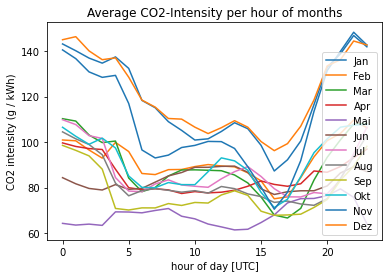

In [41]:
plt.plot(result['0'], label="Jan")
plt.plot(result['1'], label="Feb")
plt.plot(result['2'], label="Mar")
plt.plot(result['3'], label="Apr")
plt.plot(result['4'], label="Mai")
plt.plot(result['5'], label="Jun")
plt.plot(result['6'], label="Jul")
plt.plot(result['7'], label="Aug")
plt.plot(result['8'], label="Sep")
plt.plot(result['9'], label="Okt")
plt.plot(result['10'], label="Nov")
plt.plot(result['11'], label="Dez")
plt.title("Average CO2-Intensity per hour of months")
plt.ylabel("CO2 intensity (g / kWh)")
plt.xlabel("hour of day [UTC]")
plt.legend();